In [83]:
from cmdstanpy import CmdStanModel 
import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import stan
import seaborn as sns
import plotly.express as px

plt.style.use("ggplot")  #using style ggplot

In [69]:
data = pd.read_csv('./cars.csv')
data.head(10)

Unnamed: 0  mark  model generation_name  year  mileage  vol_engine    fuel  \
0           0  opel  combo      gen-d-2011  2015   139568        1248  Diesel   
1           1  opel  combo      gen-d-2011  2018    31991        1499  Diesel   
2           2  opel  combo      gen-d-2011  2015   278437        1598  Diesel   
3           3  opel  combo      gen-d-2011  2016    47600        1248  Diesel   
4           4  opel  combo      gen-d-2011  2014   103000        1400     CNG   
5           5  opel  combo      gen-d-2011  2017   121203        1598  Diesel   
6           6  opel  combo      gen-d-2011  2017   119965        1248  Diesel   
7           7  opel  combo      gen-d-2011  2016   201658        1248  Diesel   
8           8  opel  combo      gen-d-2011  2014   178666        1598  Diesel   
9           9  opel  combo      gen-d-2011  2015   113000        1248  Diesel   

              city       province  price  
0            Janki    Mazowieckie  35900  
1         Katowice        Śląskie  78501  
2            Brzeg       Opolskie  27000  
3        Korfantów       Opolskie  30800  
4  Tarnowskie Góry        Śląskie  35900  
5         Warszawa    Mazowieckie  51900  
6          Wrocław   Dolnośląskie  44700  
7           Lublin      Lubelskie  29000  
8           Złotów  Wielkopolskie  28900  
9         Strzyżew    Mazowieckie  34900

In [70]:
print(data.mark.unique())

['opel' 'audi' 'bmw' 'volkswagen' 'ford' 'mercedes-benz' 'renault'
 'toyota' 'skoda' 'alfa-romeo' 'chevrolet' 'citroen' 'fiat' 'honda'
 'hyundai' 'kia' 'mazda' 'mini' 'mitsubishi' 'nissan' 'peugeot' 'seat'
 'volvo']


In [71]:
print(data.loc[(data['mark'] == 'bmw')].model.unique())

['3gt' '5gt' 'i3' 'm2' 'm3' 'm4' 'm5' 'm8' 'seria-1' 'seria-2' 'seria-3'
 'seria-4' 'seria-5' 'seria-6' 'seria-7' 'seria-8' 'x1' 'x2' 'x3' 'x4'
 'x5' 'x5-m' 'x6' 'x6-m' 'x7']


In [72]:
segments = {
    "A": ['i3'],
    "C": ['seria-1', 'seria-2', 'm2'],
    "D": ['seria-3', 'seria-4', 'm4', 'm3', '3gt'],
    "E": ['seria-5', 'seria-8', 'm8', 'm5', '5gt', 'x6', 'x6-m', 'x5-m'],
    "F": ['seria-7', 'x7'],
    "G": ['seria-6'],
    "I": ['x1', 'x2', 'x3', 'x4', 'x5'],
}
segments_invert = {}
for key, value in segments.items():
    for val in value:
        segments_invert[str(val)] = key
segments_invert

{'i3': 'A',
 'seria-1': 'C',
 'seria-2': 'C',
 'm2': 'C',
 'seria-3': 'D',
 'seria-4': 'D',
 'm4': 'D',
 'm3': 'D',
 '3gt': 'D',
 'seria-5': 'E',
 'seria-8': 'E',
 'm8': 'E',
 'm5': 'E',
 '5gt': 'E',
 'x6': 'E',
 'x6-m': 'E',
 'x5-m': 'E',
 'seria-7': 'F',
 'x7': 'F',
 'seria-6': 'G',
 'x1': 'I',
 'x2': 'I',
 'x3': 'I',
 'x4': 'I',
 'x5': 'I'}

In [73]:
data = data.loc[(data['mark'] == 'bmw')]
data

Unnamed: 0 mark model generation_name  year  mileage  vol_engine  \
23945       23945  bmw   3gt             NaN  2015   330000        1995   
23946       23946  bmw   3gt             NaN  2017    79665        1995   
23947       23947  bmw   3gt             NaN  2014    79160        1995   
23948       23948  bmw   3gt             NaN  2015   223000        1995   
23949       23949  bmw   3gt             NaN  2018   179000        1995   
...           ...  ...   ...             ...   ...      ...         ...   
35010       35010  bmw    x7             NaN  2020    44000        2998   
35011       35011  bmw    x7             NaN  2021        5        2993   
35012       35012  bmw    x7             NaN  2021    30000        2993   
35013       35013  bmw    x7             NaN  2021       20        4395   
35014       35014  bmw    x7             NaN  2021        1        2993   

           fuel       city      province   price  
23945    Diesel    Leżajsk  Podkarpackie   57900  
23946    Diesel    Rzeszów  Podkarpackie  142000  
23947    Diesel  Nieciszów  Dolnośląskie   91700  
23948    Diesel  Nowy Sącz   Małopolskie   54900  
23949    Diesel      Płock   Mazowieckie   92700  
...         ...        ...           ...     ...  
35010  Gasoline      Płock   Mazowieckie  369000  
35011    Diesel   Katowice       Śląskie  552300  
35012    Diesel   Katowice       Śląskie  552300  
35013  Gasoline    Mikołów       Śląskie  701400  
35014    Diesel   Warszawa   Mazowieckie  549190  

[11070 rows x 11 columns]

In [74]:
#checking null value 
data.isna().sum()


Unnamed: 0            0
mark                  0
model                 0
generation_name    1600
year                  0
mileage               0
vol_engine            0
fuel                  0
city                  0
province              0
price                 0
dtype: int64

In [75]:
data.drop(columns="generation_name",inplace=True) #dropping 

#checking null value 
data.isna().sum()

Unnamed: 0    0
mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

In [76]:
data['model_types'] = data['model'].replace(segments_invert)
data

Unnamed: 0 mark model  year  mileage  vol_engine      fuel       city  \
23945       23945  bmw   3gt  2015   330000        1995    Diesel    Leżajsk   
23946       23946  bmw   3gt  2017    79665        1995    Diesel    Rzeszów   
23947       23947  bmw   3gt  2014    79160        1995    Diesel  Nieciszów   
23948       23948  bmw   3gt  2015   223000        1995    Diesel  Nowy Sącz   
23949       23949  bmw   3gt  2018   179000        1995    Diesel      Płock   
...           ...  ...   ...   ...      ...         ...       ...        ...   
35010       35010  bmw    x7  2020    44000        2998  Gasoline      Płock   
35011       35011  bmw    x7  2021        5        2993    Diesel   Katowice   
35012       35012  bmw    x7  2021    30000        2993    Diesel   Katowice   
35013       35013  bmw    x7  2021       20        4395  Gasoline    Mikołów   
35014       35014  bmw    x7  2021        1        2993    Diesel   Warszawa   

           province   price model_types  
23945  Podkarpackie   57900           D  
23946  Podkarpackie  142000           D  
23947  Dolnośląskie   91700           D  
23948   Małopolskie   54900           D  
23949   Mazowieckie   92700           D  
...             ...     ...         ...  
35010   Mazowieckie  369000           F  
35011       Śląskie  552300           F  
35012       Śląskie  552300           F  
35013       Śląskie  701400           F  
35014   Mazowieckie  549190           F  

[11070 rows x 11 columns]

/usr/local/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


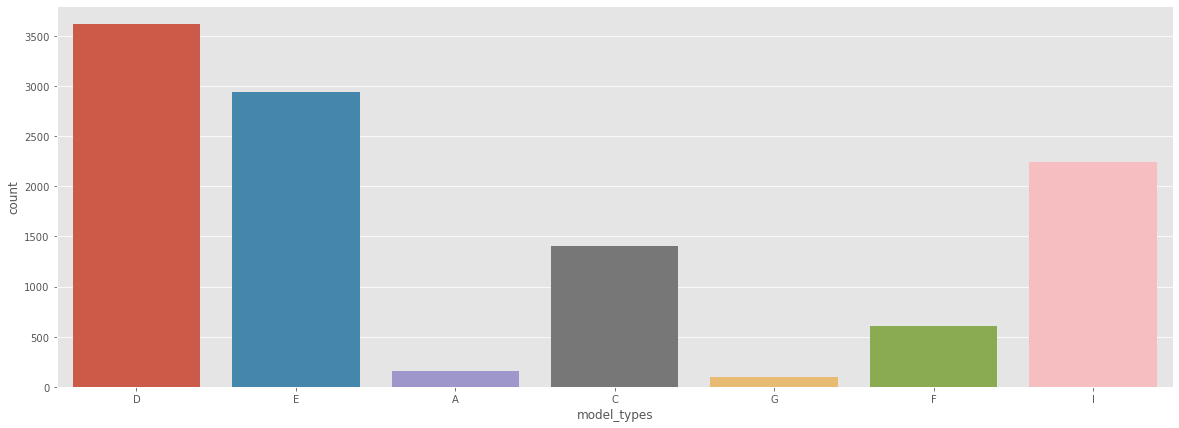

In [81]:
# how much repeat type models  in the dataset

plt.figure(figsize=(20,7))
sns.countplot(data["model_types"])
plt.show()

In [85]:
# let`s show correlation the price and the years - using interactive graph  

px.scatter(data, x="year", y="price", animation_frame="model_types", color="fuel")

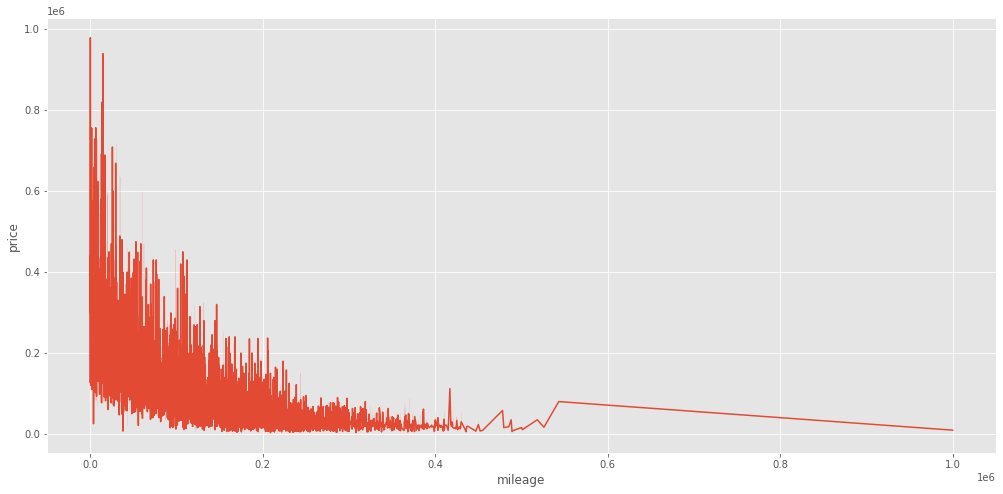

In [89]:
# let see how change the price for this vol_engine  
plt.figure(figsize=(17,8))
sns.lineplot(data=data,x="mileage",y="price")
plt.show()

In [90]:
# Standarizing mileage, vol_engine and year
# mileage
mean_mileage = data.mileage.mean()
std_mileage = data.mileage.std()

data['c_mileage'] = data.mileage - mean_mileage
data['s_mileage'] = (data.mileage - mean_mileage)/std_mileage

# vol_engine
mean_vol_engine = data.vol_engine.mean()
std_vol_engine = data.vol_engine.std()
data['c_vol_engine'] = data.vol_engine - mean_vol_engine
data['s_vol_engine'] = (data.vol_engine - mean_vol_engine)/std_vol_engine

# year
mean_year = data.year.mean()
std_year = data.year.std()
data['c_year'] = data.year - mean_year
data['s_year'] = (data.year - mean_year)/std_year

mean_price = data.price.mean()
std_price = data.price.std()
data['s_price'] = (data.price - mean_price)/std_price
data.head(10)


Unnamed: 0 mark model  year  mileage  vol_engine      fuel  \
23945       23945  bmw   3gt  2015   330000        1995    Diesel   
23946       23946  bmw   3gt  2017    79665        1995    Diesel   
23947       23947  bmw   3gt  2014    79160        1995    Diesel   
23948       23948  bmw   3gt  2015   223000        1995    Diesel   
23949       23949  bmw   3gt  2018   179000        1995    Diesel   
23950       23950  bmw   3gt  2014    48000        1997  Gasoline   
23951       23951  bmw   3gt  2017    99964        1995    Diesel   
23952       23952  bmw   3gt  2017   166000        1995    Diesel   
23953       23953  bmw   3gt  2015   278000        2993    Diesel   
23954       23954  bmw   3gt  2014   114393        1997  Gasoline   

                      city      province   price model_types      c_mileage  \
23945              Leżajsk  Podkarpackie   57900           D  184164.607498   
23946              Rzeszów  Podkarpackie  142000           D  -66170.392502   
23947            Nieciszów  Dolnośląskie   91700           D  -66675.392502   
23948            Nowy Sącz   Małopolskie   54900           D   77164.607498   
23949                Płock   Mazowieckie   92700           D   33164.607498   
23950                Radom   Mazowieckie   93900           D  -97835.392502   
23951  Gorzów Wielkopolski      Lubuskie  129900           D  -45871.392502   
23952              Świdnik     Lubelskie   89800           D   20164.607498   
23953             Radomsko       Łódzkie   79800           D  132164.607498   
23954               Lublin     Lubelskie   72000           D  -31442.392502   

       s_mileage  c_vol_engine  s_vol_engine    c_year    s_year   s_price  
23945   1.747462   -323.905059     -0.424970  2.073351  0.325603 -0.479780  
23946  -0.627863   -323.905059     -0.424970  4.073351  0.639686  0.141585  
23947  -0.632655   -323.905059     -0.424970  1.073351  0.168561 -0.230052  
23948   0.732183   -323.905059     -0.424970  2.073351  0.325603 -0.501945  
23949   0.314685   -323.905059     -0.424970  5.073351  0.796728 -0.222663  
23950  -0.928319   -321.905059     -0.422346  1.073351  0.168561 -0.213797  
23951  -0.435255   -323.905059     -0.424970  4.073351  0.639686  0.052185  
23952   0.191334   -323.905059     -0.424970  4.073351  0.639686 -0.244090  
23953   1.254055    674.094941      0.884425  2.073351  0.325603 -0.317974  
23954  -0.298344   -321.905059     -0.422346  1.073351  0.168561 -0.375603

In [91]:
def is_sorted(a):
    '''Check if numpy 1d-array is sorted '''
    if type(a) != np.ndarray:
        raise TypeError('Argument must be a numpy array but is {}'.format(type(a))) 
    if len(a.shape) > 1:
        raise ValueError('Array must be 1 dimensional but has shape {}'.format(a.shape)) 
    return np.all(a[:-1] <= a[1:])

In [92]:
LIGHT="#FFFCDC"
LIGHT_HIGHLIGHT="#FEF590"
MID="#FDED2A"
MID_HIGHLIGHT="#F0DC05"
DARK="#EECA02"
DARK_HIGHLIGHT="#BB9700"
GREEN="#00FF00"
LIGHT_GREY="#DDDDDD"


In [93]:
def sort_1d_array_and_2d_array_by_1d_array(x, fx):
    if (type(x) != np.ndarray) or (type(fx) != np.ndarray):
        raise TypeError('At least one of the arguments is not a numpy array type(x)={}, type(fx)={}',format(type(x), type(fx)))
    if len(x)!=fx.shape[1]:
        raise ValueError('2d array number of columns is not matching the 1d array. Expected {} got {}'.format(len(x),fx.shape[1]))
    arr2D = np.concatenate([np.expand_dims(x,axis=0),fx],axis=0) 
    sortedArr = arr2D [ :, arr2D[0].argsort()]
    return sortedArr[0,:], sortedArr[1:,:]

In [94]:
def get_quantiles(fx, probs=None): 
    if probs is None:
        probs = [10, 20, 30, 40, 50, 60, 70, 80, 90] 
    if len(probs) % 2 == 0:
        raise ValueError('Number of quantiles must be even') 
    if len(probs) > 11:
        raise ValueError('Too many quantiles (max is 11)') 
    if probs[int(len(probs)/2)] != 50:
        raise ValueError('Middle quantile should be 50 but is {}'.format(probs(int(len(probs)/2)))) 
    return np.percentile(fx, probs, axis=0)

In [95]:
def ribbon_plot(x, fx, ax=None,zorder=0,probs=None,supress_warning=False):
    '''Plot a ribbon plot for regression and similar.
    Plot consists of quantiles (by 10%) of a variate (fx) as a function of covariate (x). x has shape (n, )
    fx has shape (N,n)
    '''
    if ax is None:
        ax = plt.gca() 
    if not is_sorted(x):
        x, fx = sort_1d_array_and_2d_array_by_1d_array(x, fx) 
    if (len(set(x)) != len(x)) and (not supress_warning):
        warnings.warn("x variable has repeated values, which can influence the plot")
    perc_interv = get_quantiles(fx, probs)
    nq=perc_interv.shape[0]
    colortab = [LIGHT,LIGHT_HIGHLIGHT,MID,MID_HIGHLIGHT,DARK,DARK_HIGHLIGHT]
    
    for i in range(int(nq/2)): ax.fill_between(x,
                            perc_interv[i,:],
                            perc_interv[-(i+1),:],
                            color=colortab[i],
                            zorder=zorder)
    ax.plot(x,perc_interv[int(nq/2),:],color=colortab[int(nq/2)],zorder=zorder) 
    return ax

In [97]:
print("Standard diviation of mileage:",data.mileage.std())
print("Mean of mileage:",data.s_mileage.mean())
print("Standard diviation of price:",data.s_price.std())
print("Mean of price:",data.s_price.mean())
print("Minimal value of price:",data.s_price.min())
print("Maximal value of price:",data.s_price.max())
print("Maximal value of year:",data.s_year.max())

Standard diviation of mileage: 105389.793700626
Mean of mileage: -2.0539627411312744e-17
Standard diviation of price: 1.0
Mean of price: 0.0
Minimal value of price: -0.9009182258472894
Maximal value of price: 7.21966876974754
Maximal value of year: 1.424894495711727


Centered car mileage min:  -145835.39250225836
Centered car mileage max:  854163.6074977417


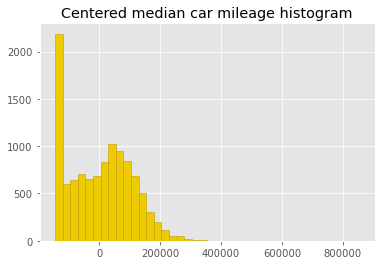

In [98]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
plt.hist(data.c_mileage, bins = 40, color = DARK, edgecolor = DARK_HIGHLIGHT)
axes.set_title("Centered median car mileage histogram")
plt.plot()
print("Centered car mileage min: ", data.c_mileage.min())
print("Centered car mileage max: ", data.c_mileage.max())

Text(0.5, 1.0, 'Price histogram')

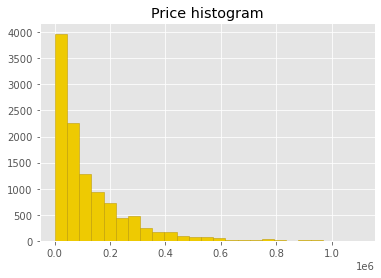

In [99]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
plt.hist(data.price, bins = 25, color = DARK, edgecolor = DARK_HIGHLIGHT)
axes.set_title("Price histogram")

[]

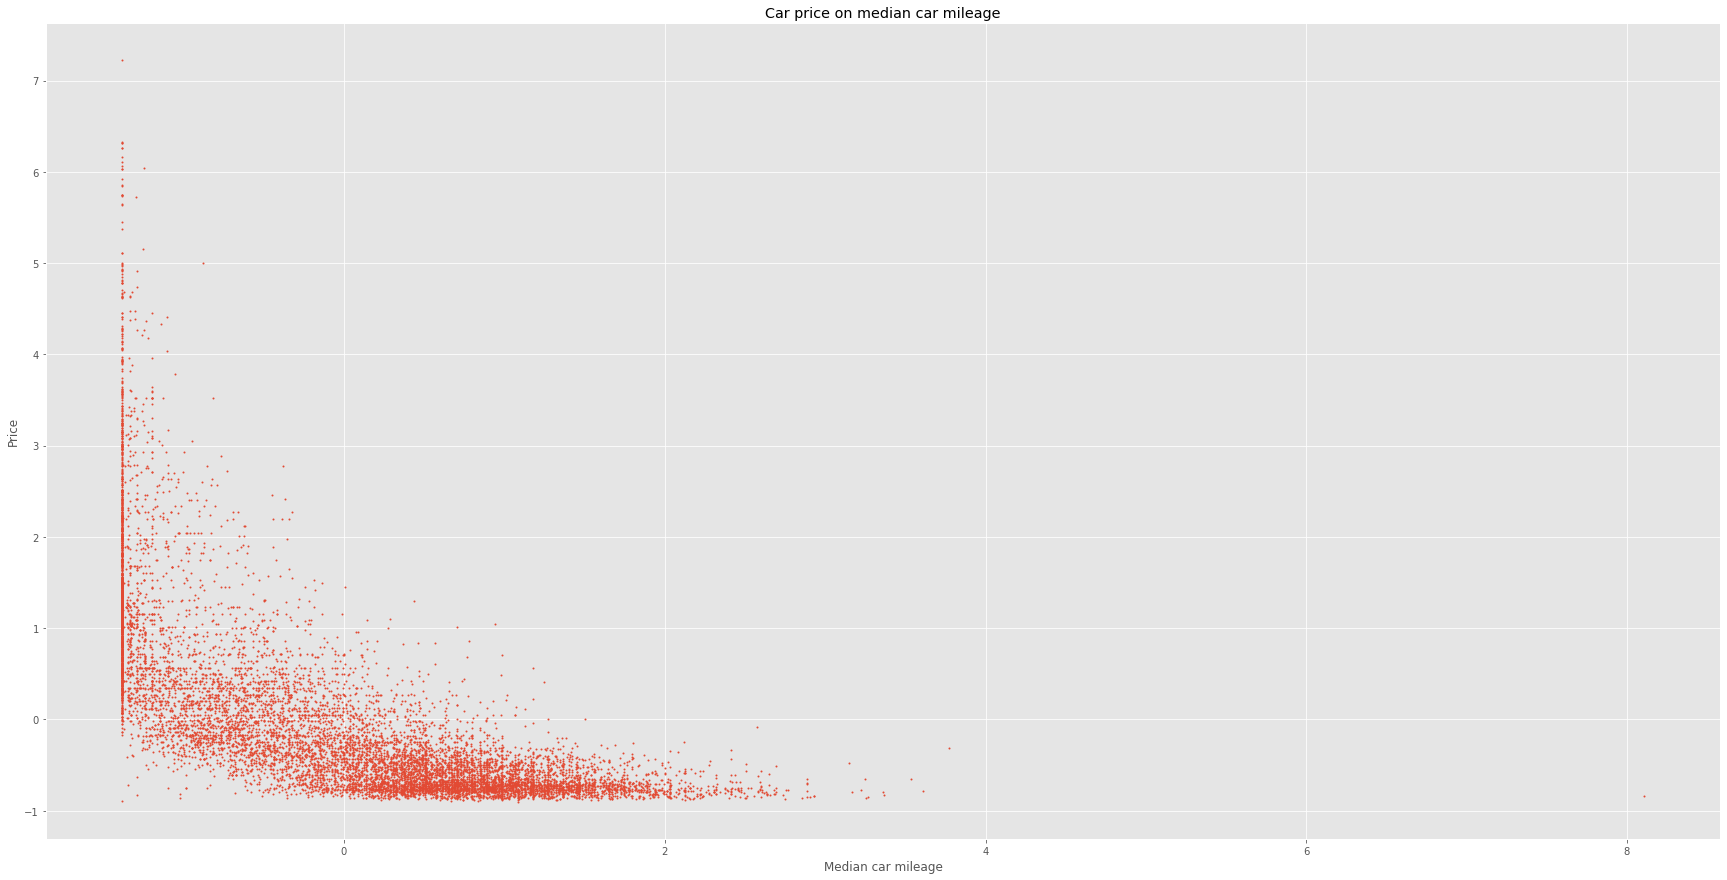

In [144]:
fig, axes = plt.subplots(1, 1, figsize=(30, 15))
plt.plot(data.s_mileage, data.s_price, 'o', markersize=1)
axes.set_xlabel("Median car mileage")
axes.set_ylabel("Price")
axes.set_title("Car price on median car mileage")
plt.plot()

In [101]:
with open('cost_ppc.stan', 'r') as file: 
    print(file.read())

data { int N;
       real mileage[N];
}
generated quantities {
            real alpha = normal_rng(0,1);
            real beta = normal_rng(0,1);
            real sigma = exponential_rng(0.01);
            real price[N];
            for (i in 1:N) {
              price[i] = normal_rng(mileage[i]*beta+alpha,sigma);
            }
}



In [102]:
model_ppc=CmdStanModel(stan_file='cost_ppc.stan')
R = 1000
data_sim={'N': 50, 'mileage': np.linspace(data.s_mileage.min(),data.s_mileage.max())}
sim=model_ppc.sample(data=data_sim,
                        iter_sampling=R, 
                        iter_warmup=0, 
                        chains=1,
                        fixed_param=True, 
                        seed=29042020)

alpha_sim=sim.stan_variable('alpha')
beta_sim=sim.stan_variable('beta')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |█████████████████████████████████████████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


[]

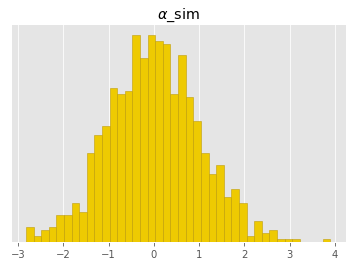

In [103]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
ax = axes 
ax.hist(alpha_sim, bins=40, color=DARK, edgecolor=DARK_HIGHLIGHT, density=True) 
ax.set_title(r'$\alpha$_sim')
ax.set_yticks(())

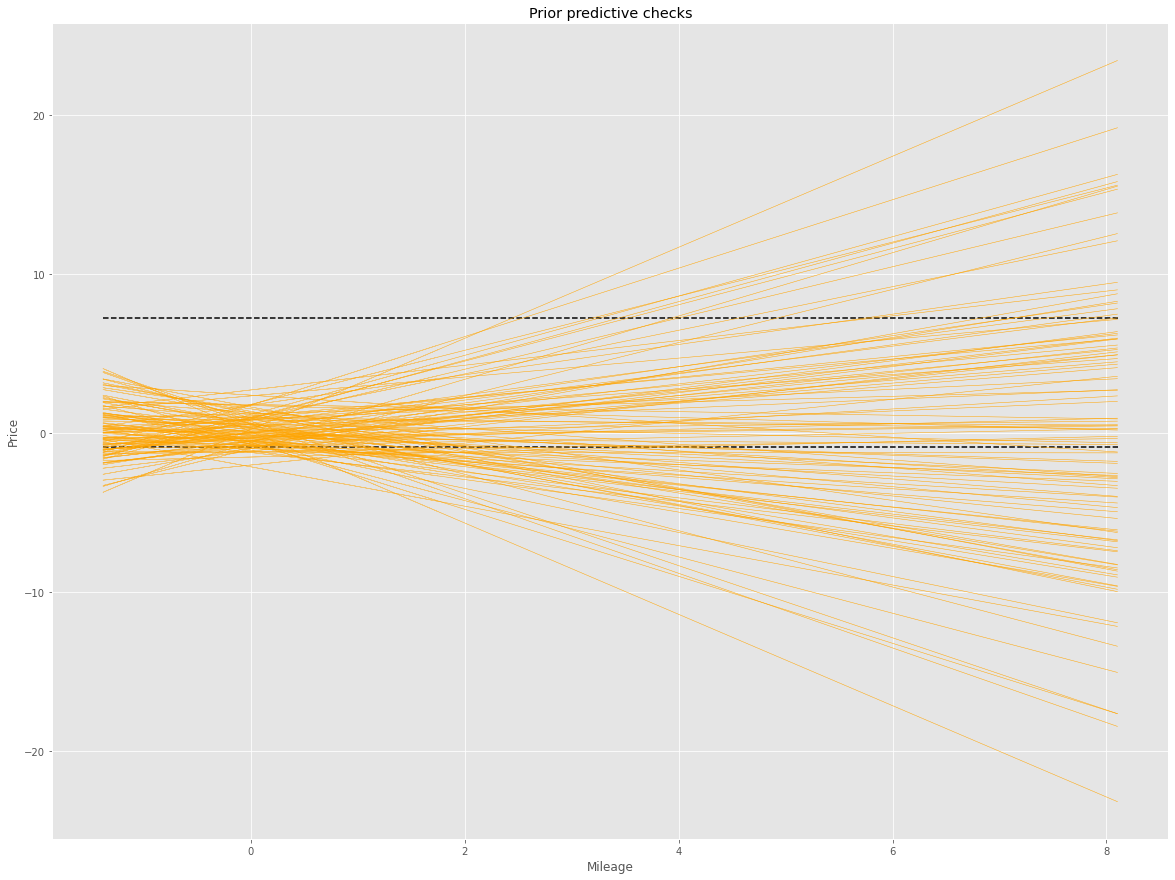

In [104]:
fig, axes = plt.subplots(1, 1, figsize=(20, 15))
axes.hlines([data.s_price.min(), data.s_price.max()], xmin=data.s_mileage.min(),xmax=data.s_mileage.max(),linestyle='--',color='black')

for i in range(100):
    axes.plot(data.s_mileage, alpha_sim[i]+beta_sim[i]*data.s_mileage,color='orange',alpha=0.5,linewidth=0.5)
axes.set_xlabel('Mileage')
axes.set_ylabel('Price')
axes.set_title(r'Prior predictive checks')
axes.annotate(text='4mln PLN', xy=(10000,4100000))
plt.show()

Model u gory nie ma sensu, duzo hajsu jest ponizej 0 co nijak przeklada sie na rzeczywistosc, trzbea zmienic funckje dystrybucji z normal na lognormal

In [227]:
with open('cost_ppc_improved.stan', 'r') as file: 
    print(file.read())

data { int N;
       real mileage[N];
}
generated quantities {
            real alpha = normal_rng(1,1);
            real beta = -lognormal_rng(-1,1);
            real <lower = 0> sigma = exponential_rng(0.3); # variable that provide better ribbon plot
            real price[N];
            for (i in 1:N) {
              price[i] = normal_rng(mileage[i]*beta+alpha,sigma);
            }
}




In [232]:
model_ppc=CmdStanModel(stan_file='cost_ppc_improved.stan')
R = 1000
data_sim={'N': 50, 'mileage': np.linspace(data.s_mileage.min(),data.s_mileage.max())}
sim=model_ppc.sample(data=data_sim,
                        iter_sampling=R, 
                        iter_warmup=0, 
                        chains=1,
                        fixed_param=True, 
                        seed=29042020)

alpha_sim_improved=sim.stan_variable('alpha')
beta_sim_improved=sim.stan_variable('beta')

INFO:cmdstanpy:compiling stan file /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_ppc_improved.stan to exe file /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_ppc_improved
INFO:cmdstanpy:compiled model executable: /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_ppc_improved
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_ppc_improved.hpp /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_ppc_improved.stan
Warning in '/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_ppc_improved.stan', line 2, column 7: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_ppc_improved.stan', line


INFO:cmdstanpy:CmdStan done processing.


[]

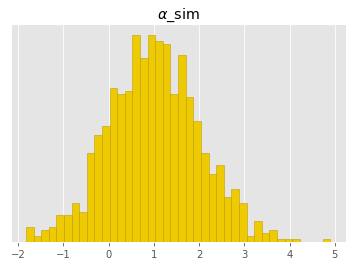

In [233]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
ax = axes 
ax.hist(alpha_sim_improved, bins=40, color=DARK, edgecolor=DARK_HIGHLIGHT, density=True) 
ax.set_title(r'$\alpha$_sim')
ax.set_yticks(())

[]

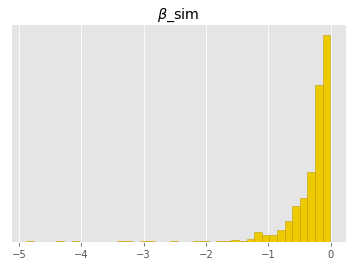

In [234]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
ax = axes 
ax.hist(beta_sim_improved, bins=40, color=DARK, edgecolor=DARK_HIGHLIGHT, density=True) 
ax.set_title(r'$\beta$_sim')
ax.set_yticks(())

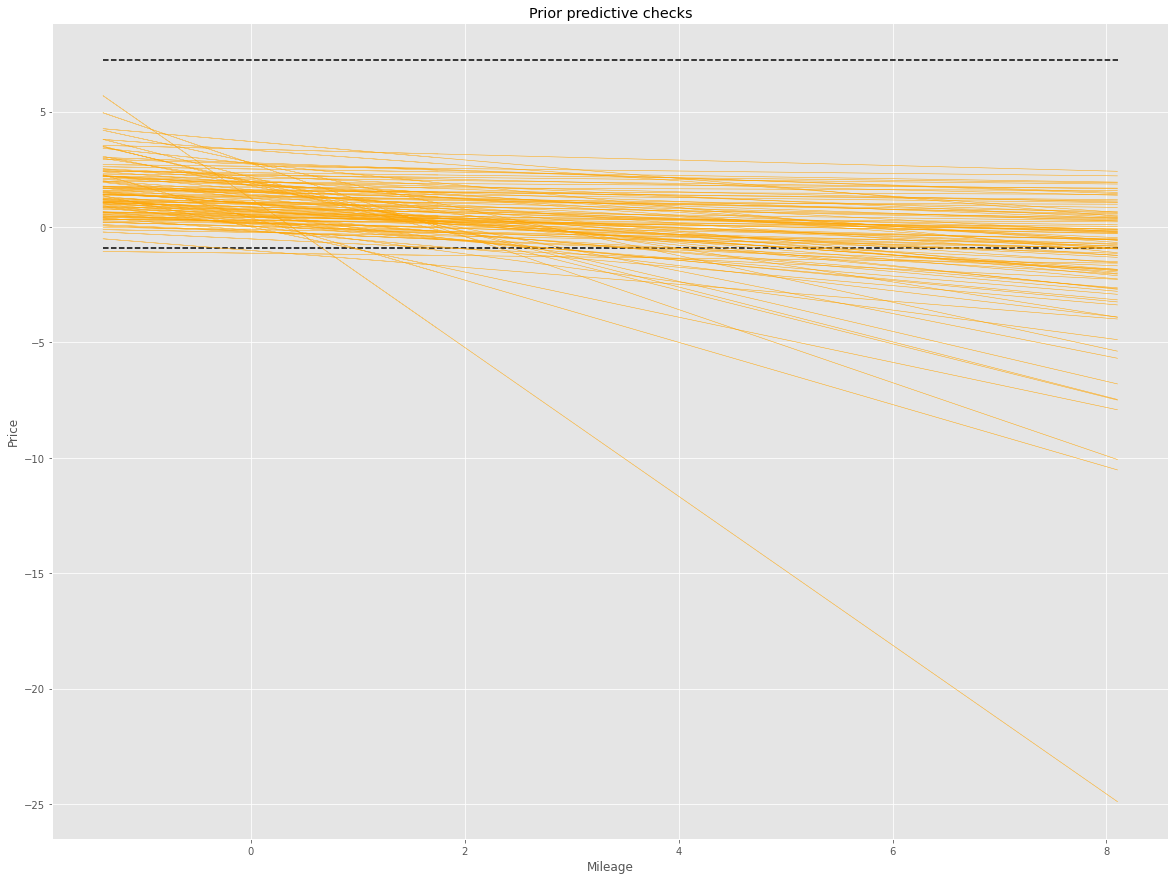

In [235]:
fig, axes = plt.subplots(1, 1, figsize=(20, 15))
axes.hlines([data.s_price.min(), data.s_price.max()], xmin=data.s_mileage.min(),xmax=data.s_mileage.max(),linestyle='--',color='black')
for i in range(100):
    axes.plot(data.s_mileage, alpha_sim_improved[i]+beta_sim_improved[i]*data.s_mileage,color='orange',alpha=0.5,linewidth=0.5)
axes.set_xlabel('Mileage')
axes.set_ylabel('Price')
axes.set_title(r'Prior predictive checks')
axes.annotate(text='2mln PLN', xy=(10000,2100000))
plt.show()

O WIELE LEPIEJ TO WYGLADA JUZ

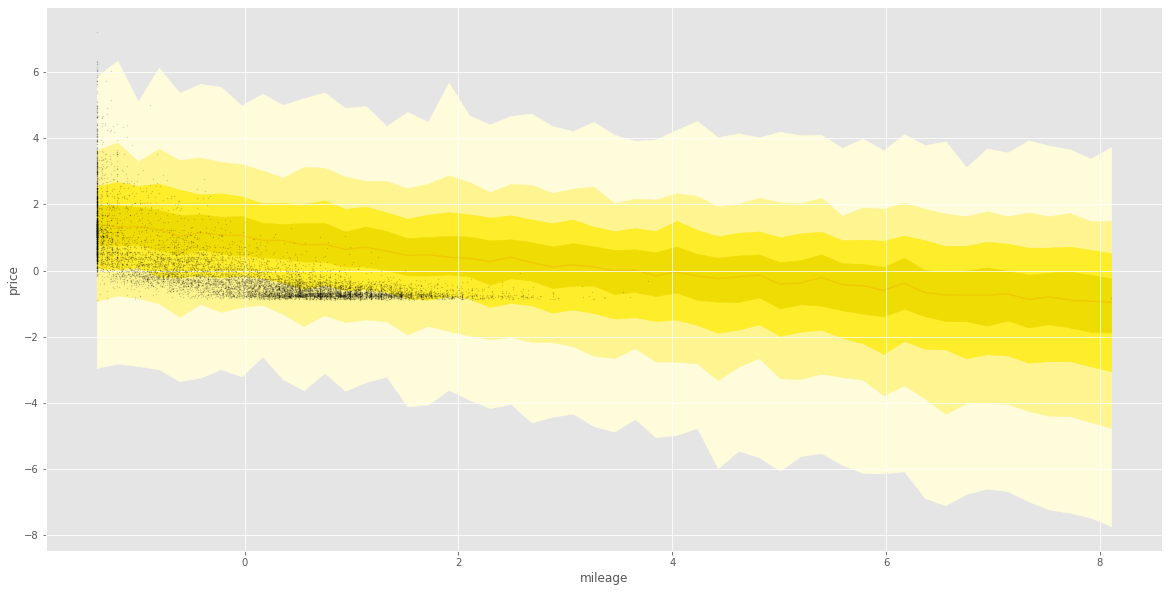

In [236]:
price_sim=sim.stan_variable('price')
fig, axes = plt.subplots(1, 1, figsize=(20,10))
axes=ribbon_plot(data_sim['mileage'] + data.s_mileage.mean(), price_sim, axes)
axes.scatter(data.s_mileage, data.s_price, color='black', alpha=0.1, s=1)
axes.set_xlabel('mileage')
axes.set_ylabel('price')
plt.show()

In [208]:
with open('cost_2_fit.stan', 'r') as file: 
    print(file.read())

data { 
    int N;
    vector[N] mileage;
    real price[N];
}

parameters {
            real alpha;
            real beta;
            real<lower=0> sigma;
}
          
transformed parameters {
            vector[N] mu = mileage*beta+alpha;
}

model {
        alpha ~ normal(1,1);
        beta ~ lognormal(0,1);
        sigma ~ exponential(0.9);
        price ~ normal(mu,sigma);
}

generated quantities {
                    real prices[N];
                    real log_lik[N];
                    for (i in 1:N) {
                      prices[i] = normal_rng(mu[i],sigma);
                      log_lik[i] = normal_lpdf(price[i] | mu[i], sigma);
                    }
}


In [209]:
model_2_fit=CmdStanModel(stan_file='cost_2_fit.stan') 
model_2_fit.compile(force=False)
d_short=data.head(1000)
data_fit=dict(N=len(d_short),
              mileage=d_short.s_mileage.values,
              price=d_short.s_price.values)
fit=model_2_fit.sample(data=data_fit,seed=28052020)
alpha_fit=fit.stan_variable('alpha')
beta_fit=fit.stan_variable('beta')
mu_fit=fit.stan_variable('mu')
price_pred=fit.stan_variable('prices')
log_lik=fit.stan_variable('log_lik')
az.summary(fit,var_names=['alpha','beta','sigma'],round_to=2,kind='stats')

INFO:cmdstanpy:compiling stan file /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_2_fit.stan to exe file /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_2_fit
INFO:cmdstanpy:compiled model executable: /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_2_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_2_fit.hpp /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_2_fit.stan
Warning in '/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_2_fit.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_2_fit.stan', line 25, column 20: Declaration
    of arrays by plac


INFO:cmdstanpy:CmdStan done processing.


mean    sd  hdi_3%  hdi_97%
alpha  0.13  0.04    0.04     0.21
beta   0.01  0.01    0.00     0.02
sigma  1.43  0.03    1.37     1.49

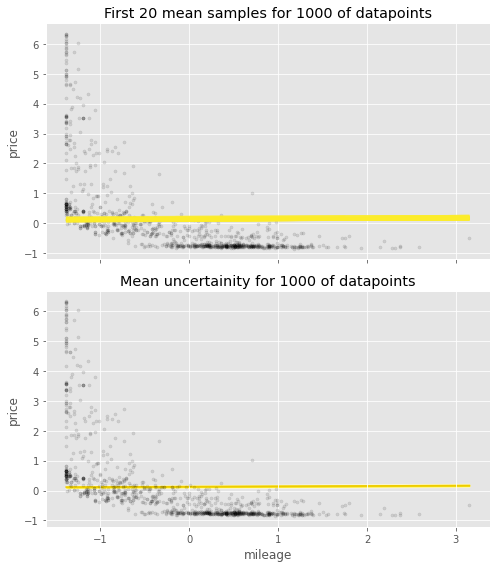

In [210]:
fig, axes = plt.subplots(2,1, figsize=(7, 8),sharey=True,sharex=True) 
ax0=axes[0]
for i in range(100):
    ax0.plot(d_short.s_mileage,
              alpha_fit[i]+beta_fit[i]*d_short.s_mileage,
                color=MID,
                alpha=0.5,linewidth=0.5) 
ax0.scatter(d_short.s_mileage,d_short.s_price,color='black',alpha=0.1,s=10) 
ax0.set_title('First 20 mean samples for {} of datapoints'.format(len(d_short))) 
ax0.set_ylabel('price')
ax1=axes[1]
ax1=ribbon_plot(d_short.s_mileage.values,mu_fit,ax1,supress_warning=True) 
ax1.scatter(d_short.s_mileage,d_short.s_price,color='black',alpha=0.1,s=10) 
ax1.set_xlabel('mileage')
ax1.set_ylabel('price')
ax1.set_title('Mean uncertainity for {} of datapoints'.format(len(d_short))) 
fig.tight_layout()
plt.show()

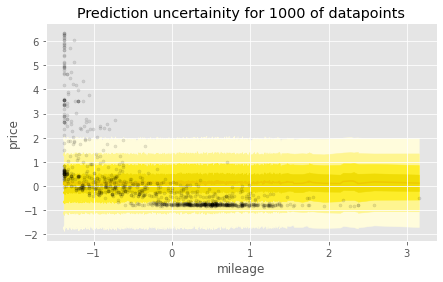

In [211]:
fig, axes = plt.subplots(1, 1, figsize=(7, 4))
axes = ribbon_plot(d_short.s_mileage.values,price_pred,axes,supress_warning=True) 
axes.scatter(d_short.s_mileage,d_short.s_price,color='black',alpha=0.1,s=10) 
axes.set_xlabel('mileage')
axes.set_ylabel('price')
axes.set_title('Prediction uncertainity for {} of datapoints'.format(len(d_short))) 
plt.show()

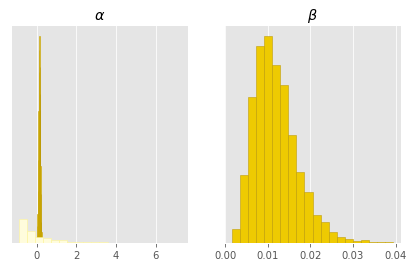

In [212]:
ig, axes = plt.subplots(1, 2, figsize=(7, 4))
ax = axes[0] 
ax.hist(alpha_fit,bins=20,color=DARK,edgecolor=DARK_HIGHLIGHT,density=True) 
ax.hist(data.s_price,bins=20,color=LIGHT,edgecolor=LIGHT_HIGHLIGHT,density=True) 
ax.set_title(r'$\alpha$')
ax.set_yticks(())
ax2 = axes[1] 
ax2.hist(beta_fit,bins=20,color=DARK,edgecolor=DARK_HIGHLIGHT,density=True) 
ax2.set_title(r'$\beta$')
ax2.set_yticks(())
fig.tight_layout()
plt.show()

Adding second predictor - BMI

In [746]:
# centering variables
data['s_vol_engine2'] = data.s_vol_engine*data.s_vol_engine
data['s_vol_engine3'] = data.s_vol_engine*data.s_vol_engine*data.s_vol_engine


data.head(10)

Unnamed: 0  mark  model generation_name  year  mileage  vol_engine    fuel  \
0           0  opel  combo      gen-d-2011  2015   139568        1248  Diesel   
1           1  opel  combo      gen-d-2011  2018    31991        1499  Diesel   
2           2  opel  combo      gen-d-2011  2015   278437        1598  Diesel   
3           3  opel  combo      gen-d-2011  2016    47600        1248  Diesel   
4           4  opel  combo      gen-d-2011  2014   103000        1400     CNG   
5           5  opel  combo      gen-d-2011  2017   121203        1598  Diesel   
6           6  opel  combo      gen-d-2011  2017   119965        1248  Diesel   
7           7  opel  combo      gen-d-2011  2016   201658        1248  Diesel   
8           8  opel  combo      gen-d-2011  2014   178666        1598  Diesel   
9           9  opel  combo      gen-d-2011  2015   113000        1248  Diesel   

              city       province  ...  s_mileage  c_vol_engine  s_vol_engine  \
0            Janki    Mazowieckie  ...  -0.190338   -351.194141     -1.074924   
1         Katowice        Śląskie  ...  -1.557194   -100.194141     -0.306671   
2            Brzeg       Opolskie  ...   1.574111     -1.194141     -0.003655   
3        Korfantów       Opolskie  ...  -1.358869   -351.194141     -1.074924   
4  Tarnowskie Góry        Śląskie  ...  -0.654965   -199.194141     -0.609687   
5         Warszawa    Mazowieckie  ...  -0.423680     -1.194141     -0.003655   
6          Wrocław   Dolnośląskie  ...  -0.439410   -351.194141     -1.074924   
7           Lublin      Lubelskie  ...   0.598568   -351.194141     -1.074924   
8           Złotów  Wielkopolskie  ...   0.306436     -1.194141     -0.003655   
9         Strzyżew    Mazowieckie  ...  -0.527906   -351.194141     -1.074924   

     c_year    s_year   s_price  c_vol_engine2  c_vol_engine3  s_vol_engine2  \
0  3.331711  0.644302  0.027795  123337.324916  -4.331535e+07       1.155461   
1  6.331711  1.224457  1.525978   10038.865960  -1.005836e+06       0.094047   
2  3.331711  0.644302 -0.285198       1.425974  -1.702814e+00       0.000013   
3  4.331711  0.837687 -0.151561  123337.324916  -4.331535e+07       1.155461   
4  2.331711  0.450917  0.027795   39678.305947  -7.903686e+06       0.371718   
5  5.331711  1.031072  0.590480       1.425974  -1.702814e+00       0.000013   
6  5.331711  1.031072  0.337272  123337.324916  -4.331535e+07       1.155461   
7  4.331711  0.837687 -0.214863  123337.324916  -4.331535e+07       1.155461   
8  2.331711  0.450917 -0.218380       1.425974  -1.702814e+00       0.000013   
9  3.331711  0.644302 -0.007373  123337.324916  -4.331535e+07       1.155461   

   s_vol_engine3  
0  -1.242033e+00  
1  -2.884154e-02  
2  -4.882684e-08  
3  -1.242033e+00  
4  -2.266319e-01  
5  -4.882684e-08  
6  -1.242033e+00  
7  -1.242033e+00  
8  -4.882684e-08  
9  -1.242033e+00  

[10 rows x 22 columns]

In [748]:
with open('cost_3_fit.stan', 'r') as file: 
    print(file.read())

data { int N;
  vector[N] mileage;
  vector[N] vol_engine;
  real price[N];
}

parameters {
  real alpha;
  real beta_mileage;
  real beta_vol_engine;
  real beta_vol_engine2;
  real beta_vol_engine3;


  real<lower=0> sigma;
}

transformed parameters {
  vector[N] mu = mileage*beta_mileage+vol_engine*beta_vol_engine+(vol_engine^2)*beta_vol_engine2+ +(vol_engine^3)*beta_vol_engine3 +alpha;
}

model {
  alpha ~ normal(0,1);
  beta_mileage ~ lognormal(0,1);
  beta_vol_engine ~ lognormal(0, 10);
  sigma ~ exponential(0.001);
  price ~ normal(mu,sigma);
}

generated quantities {
  real prices[N];
  real log_lik[N];
  for (i in 1:N) {
    prices[i] = normal_rng(mu[i],sigma);
    log_lik[i] = normal_lpdf(price[i] | mu[i], sigma);
  }
}


In [757]:
model_3_fit=CmdStanModel(stan_file='cost_3_fit.stan') 
model_3_fit.compile(force=False)
d_short=data.head(1000)
data_fit=dict(N=len(d_short),
              mileage=d_short.s_mileage.values,
              vol_engine=d_short.s_vol_engine.values,
              price=d_short.s_price.values)

fit_2 = model_3_fit.sample(data=data_fit,seed=28052020)
alpha_fit = fit_2.stan_variable('alpha')
beta_mileage_fit = fit_2.stan_variable('beta_mileage')
beta_vol_engine_fit = fit_2.stan_variable('beta_vol_engine')
beta_vol_engine_fit2 = fit_2.stan_variable('beta_vol_engine2')
beta_vol_engine_fit3 = fit_2.stan_variable('beta_vol_engine3')


mu_fit_2 = fit_2.stan_variable('mu')
price_pred_2 = fit_2.stan_variable('prices')
log_lik = fit_2.stan_variable('log_lik')
az.summary(fit_2,var_names=['alpha','beta_mileage','beta_vol_engine','sigma'],round_to=2,kind='stats')
# Values are standarized so we can see that Age variable is much more important by looking at mean for both betas in
#summary below

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |                                                         | 00:00 Status
chain 2 |                                                         | 00:00 Status

chain 3 |                                                         | 00:00 Status


chain 4 |                                                         | 00:00 Status

chain 1 |██▏                     | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 2 |██▏                     | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 4 |██▏                     | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 3 |███▎                    | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 4 |███▎                    | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |███▎                    | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 3 |████▎                   |


INFO:cmdstanpy:CmdStan done processing.


mean    sd  hdi_3%  hdi_97%
alpha           -0.66  0.02   -0.69    -0.64
beta_mileage     0.01  0.00    0.00     0.01
beta_vol_engine  0.00  0.00    0.00     0.00
sigma            0.45  0.01    0.44     0.46

In [758]:
log_lik

array([[ -0.941273, -11.0313  ,  -0.51356 , ...,  -0.177051,  -0.179736,
         -0.17618 ],
       [ -0.939392, -11.0295  ,  -0.513065, ...,  -0.176984,  -0.179733,
         -0.176065],
       [ -0.939247, -11.0291  ,  -0.51301 , ...,  -0.176994,  -0.179747,
         -0.17607 ],
       ...,
       [ -0.960882, -12.0723  ,  -0.466422, ...,  -0.120549,  -0.123968,
         -0.116138],
       [ -0.960025, -12.0346  ,  -0.464536, ...,  -0.121999,  -0.125357,
         -0.117405],
       [ -0.963116, -12.0833  ,  -0.465833, ...,  -0.12016 ,  -0.123505,
         -0.11572 ]])

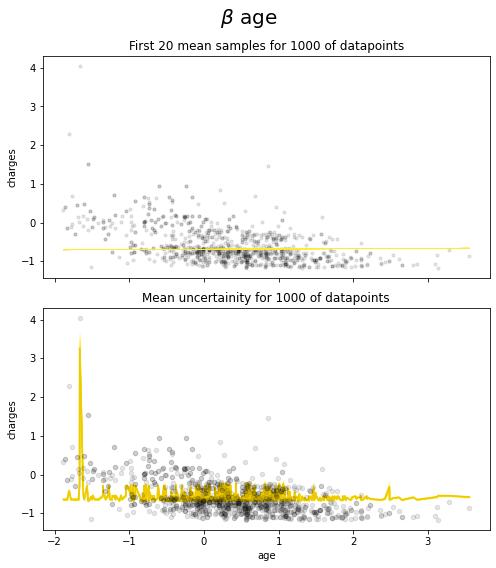

In [759]:
fig, axes = plt.subplots(2,1, figsize=(7, 8),sharey=True,sharex=True) 
ax0=axes[0]
for i in range(20):
    ax0.plot(d_short.s_mileage,
              alpha_fit[i]+beta_mileage_fit[i]*d_short.s_mileage,
              color=MID,
              alpha=0.5,linewidth=0.5)
ax0.scatter(d_short.s_mileage,d_short.s_price,color='black',alpha=0.1,s=10) 
ax0.set_title('First 20 mean samples for {} of datapoints'.format(len(d_short))) 
fig.suptitle(r'$\beta$ age', fontsize=20)
ax0.set_ylabel('charges')
ax1=axes[1] 
ax1=ribbon_plot(d_short.s_mileage.values,mu_fit_2,ax1,supress_warning=True) 
ax1.scatter(d_short.s_mileage,d_short.s_price,color='black',alpha=0.1,s=20) 
ax1.set_xlabel('age')
ax1.set_ylabel('charges')
ax1.set_title('Mean uncertainity for {} of datapoints'.format(len(d_short))) 
fig.tight_layout()
plt.show()

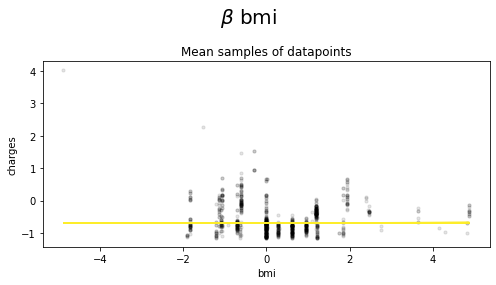

In [760]:
fig, axes = plt.subplots(1,1, figsize=(7, 4),sharey=True,sharex=True) 
for i in range(459):
    axes.plot(d_short.s_vol_engine,
              alpha_fit[i]+beta_vol_engine_fit[i]*d_short.s_vol_engine,
              color=MID,
              alpha=0.5,linewidth=0.5)
axes.scatter(d_short.s_vol_engine,d_short.s_price,color='black',alpha=0.1,s=10)
axes.set_title('Mean samples of datapoints'.format(len(d_short)))
fig.suptitle(r'$\beta$ bmi', fontsize=20)
axes.set_ylabel('charges')
axes.set_xlabel('bmi')
fig.tight_layout()
plt.show()
# beta for BMI parameter is very close to 0 and insignificant

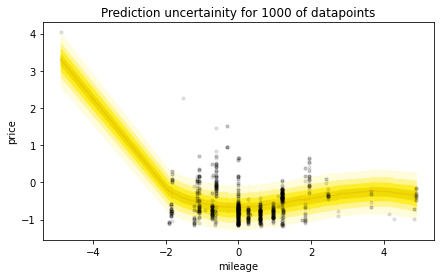

In [761]:
fig, axes = plt.subplots(1, 1, figsize=(7, 4))
axes = ribbon_plot(d_short.s_vol_engine.values,price_pred_2,axes,supress_warning=True) 
axes.scatter(d_short.s_vol_engine,d_short.s_price,color='black',alpha=0.1,s=10) 
axes.set_xlabel('mileage')
axes.set_ylabel('price')
axes.set_title('Prediction uncertainity for {} of datapoints'.format(len(d_short))) 
plt.show()

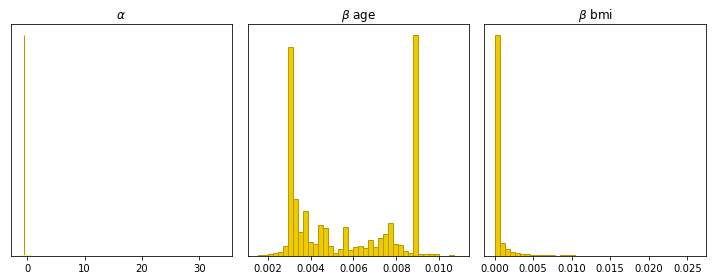

In [762]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
ax = axes[0] 
ax.hist(alpha_fit,bins=40,color=DARK,edgecolor=DARK_HIGHLIGHT,density=True) 
ax.hist(data.s_price,bins=40,color=LIGHT,edgecolor=LIGHT_HIGHLIGHT,density=True) 
ax.set_title(r'$\alpha$')
ax.set_yticks(())
ax2 = axes[1] 
ax2.hist(beta_mileage_fit,bins=40,color=DARK,edgecolor=DARK_HIGHLIGHT,density=True) 
ax2.set_title(r'$\beta$ age')
ax2.set_yticks(())
fig.tight_layout()
ax2 = axes[2] 
ax2.hist(beta_vol_engine_fit,bins=40,color=DARK,edgecolor=DARK_HIGHLIGHT,density=True) 
ax2.set_title(r'$\beta$ bmi')
ax2.set_yticks(())
fig.tight_layout()
plt.show()

Comparing models

In [766]:
# Comparing 2 models: model_1 - with AGE only, model_2 - with AGE and BMI
idata1 = az.from_cmdstanpy(posterior = fit, log_likelihood = "log_lik")
idata2 = az.from_cmdstanpy(posterior = fit_2, log_likelihood = "log_lik") 
compare_dict = {"model_1": idata1, "model_2": idata2}
az.compare(compare_dict, ic = "loo") # loo stands for leave one out cross validation

/usr/local/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/arviz/stats/stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/arviz/stats/stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


rank         loo     p_loo      d_loo    weight         se  \
model_2     0 -621.087877  3.684125   0.000000  0.794552  35.052091   
model_1     1 -684.923495  8.284548  63.835618  0.205448  58.359184   

               dse  warning loo_scale  
model_2   0.000000     True       log  
model_1  47.947544     True       log

In [767]:
# Comparing 2 models: model_1 - with AGE only, model_2 - with AGE and BMI
idata1 = az.from_cmdstanpy(posterior = fit, log_likelihood = "log_lik")
idata2 = az.from_cmdstanpy(posterior = fit_2, log_likelihood = "log_lik") 
compare_dict = {"model_1": idata1, "model_2": idata2}
az.compare(compare_dict, ic = "waic") # loo stands for leave one out cross validation

/usr/local/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/arviz/stats/stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/arviz/stats/stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


rank        waic    p_waic     d_waic    weight         se  \
model_2     0 -621.231257  3.827504   0.000000  0.794378  35.056214   
model_1     1 -684.055640  7.416693  62.824383  0.205622  57.646175   

               dse  warning waic_scale  
model_2   0.000000     True        log  
model_1  46.970426     True        log

/usr/local/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/arviz/stats/stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/arviz/stats/stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<AxesSubplot:xlabel='Log'>

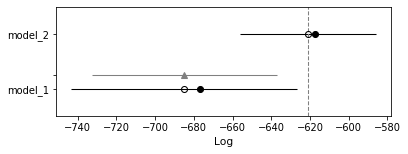

In [765]:
az.plot_compare(az.compare(compare_dict))
